# Practicing Mapping skills with Antarctic map

In [73]:
%config InlineBackend.figure_format = 'retina'

## Notebook setup and software preparation

Prepare dependent libraries for the network to work in Google Colab.

## Map of seismic networks in Antarctica

First, we query the all stations available below 60 degree south from 2000 to now from the IRIS Data Management Center (https://ds.iris.edu/ds/nodes/dmc/).

In [ ]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

## Client connected to the IRIS Data Management Center ()
client = Client("IRIS")

## Get all stations south of 60 degrees latitude
inv = client.get_stations(minlatitude=-90, maxlatitude=-60, minlongitude=-180, maxlongitude=180, starttime=UTCDateTime(2000,1,1))

## For convenience, you can also use the network code "_ANTARCTICA" to get all stations in Antarctica
# inv = client.get_stations(network="_ANTARCTICA", starttime=UTCDateTime(2000,1,1))

## Print the%config matplotlib.inline = 'retina' inventory to check the contents
for net in inv: 
    print (f"{net.code} | {net.start_date.date} to {"present" if net.end_date is None  else net.end_date.date}: {net.description}")

1D | 2010-01-01 to 2011-12-31: Elevation change anomalies in West Antarctica and dynamics of subglacial water beneath ice streams and their tributaries (Whillans/UCSC)
1D | 2016-01-01 to 2018-12-31: UKANET: UK Antarctic Network (UKANET)
1G | 2022-01-01 to 2028-12-31: Erebus Backbone Network (EBN)
1J | 2018-01-01 to 2019-12-31: Totten Glacier Active and Passive Source Experiment (Totten Glacier 2018-19)
2A | 2017-01-01 to 2019-12-31: Sorsdal_Glacier_17-18 (Sorsdal)
2C | 2010-01-01 to 2011-12-31: Geophysical Study of Ice Stream Stick-slip dynamics (Whillans Ice Stream)
2H | 2016-01-01 to 2025-12-31: Interim Broadband Monitoring of the Mount Erebus Volcano (Erebus Interim)
4A | 2008-01-01 to 2008-12-31: Investigating mechanisms of subglacial hydrology and basal shear stress beneath Whillans Ice Stream using passive seismology (Whillans Ice Sheet)
5K | 2019-01-01 to 2020-12-31: Kamb Ice Stream Outlet Channel (KambSeis)
6L | 2019-01-01 to 2020-12-31: BEAMISH 2019-20, Rutford Ice Stream, Wes

Second, we create a basemap object using the [South Pole steographic projection](https://matplotlib.org/basemap/stable/users/pstere.html) to plot the station location.

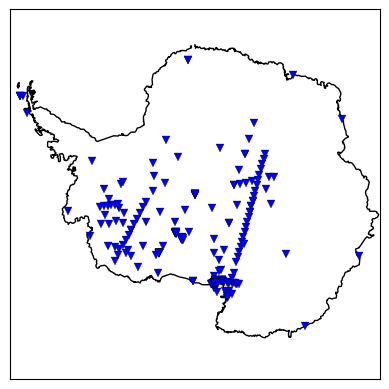

In [ ]:
# import a general plotting library
import matplotlib.pyplot as plt
# import basemap toolkit for geographic plotting
from mpl_toolkits.basemap import Basemap

## Create a map of the Antarctic region at low resolution. 
# The resolution can be set to 'c' for crude, 'i' for intermediate, 'h' for high resolution
# If an error with 'i' or 'h', you probably need to install `pip install geographiclib`
m = Basemap(projection='spstere', boundinglat=-65, lon_0=180, resolution='l')

## Draw the Antarctic coastline, whose level of details depends on the resolution parameter above.
m.drawcoastlines()

## Draw the latitude and longitude grid
# m.drawparallels(range(-90, -60, 5), labels=[0,0,0,0], maxlat=-89) # Draw the latitude grid every 5 degrees
# m.drawmeridians(range(-180, 180, 30), labels=[0,0,0,0], maxlat=-89) # Draw the longitude grid every 30 degrees

## Plot the location of the stations in the inventory
# To do this, first we need to collect the latitude and longitude of all stations into two lists
stlo = []
stla = []
for net in inv:
    for sta in net:
        stlo.append(sta.longitude)
        stla.append(sta.latitude)
# Then we plot the stations on the map using the plot() function with `latlon=True` to indicate that the coordinates are in latitude and longitude
m.plot(stlo, stla, 'bv', latlon=True, mec='k', mew=0.2) # 'bv' means blue color, triangle shape

## Show the map
plt.show()

Now, we want to make the map more informative by denoting significant networks with markers of different shapes and colors.

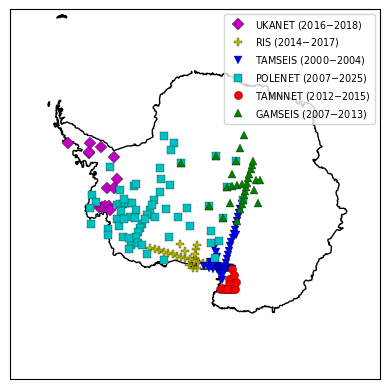

In [50]:
## Define a tuple of major networks' abbreviations
networks = [
    'TAMSEIS', # A Broadband Seismic Investigation of Deep Continental Structure Across the East-West Antarctic Boundary
    'GAMSEIS', # A Broadband Seismic Experiment to Image the Lithosphere beneath the Gamburtsev Mountains, East Antarctica
    'TAMNNET', # Transantarctic Mountains Northern Network
    'POLENET', #IPY POLENET-Antarctica: Investigating links between geodynamics and ice sheets
    'UKANET', # UKANET: UK Antarctic Network
    'RIS' # Collaborative Research: Collaborative Research: Dynamic Response of the Ross Ice Shelf to Ocean Waves and Structure and Dynamics of the Ross Sea from a Passive Seismic Deployment on the Ross Ice Shelf (Ross Ice Shelf (RIS))
]

markers = ['bv', 'g^', 'ro', 'cs', 'mD', 'yP']

## Create a map of the Antarctic region at low resolution. 
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='l')
## Draw the Antarctic coastline, whose level of details depends on the resolution parameter above.
m.drawcoastlines()
## Plot the location of the stations in the inventory
for net in inv:
    # Collect station geographical coordinates
    stla = [sta.latitude for sta in net]
    stlo = [sta.longitude for sta in net]
    # Check if the network is in the list of major networks
    for ii, network in enumerate(networks):
        if f"({network})" in net.description:
            m.plot(stlo, stla, markers[ii], latlon=True, mec='k', mew=0.2,
                    label=f"{network} ({net.start_date.year}$-${net.end_date.year})")
            break
        # else:
        #     m.plot(stlo, stla, 'o', c='gray', latlon=True, mec='k', mew=0.2, label="Other Networks")
## Add a legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='x-small')

## Show the map
plt.show()

## Ice thickness background map

So far, we have been ploting locations of seismic stations or earthquakes on a map. Here, we will look at ways to plot gridded data as the map background. 

In preparation for the plot, we download an open dataset of ice thickness in Antarctica.

In [55]:
## Download the Bedmap2 dataset in GeoTIFF format and unzip the downloaded file
# !wget https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip
# !unzip bedmap2_tiff.zip
## Download the readme file for further information
!wget https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_readme.txt
# !ls bedmap2_tiff/

--2025-03-13 15:03:01--  https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_readme.txt
Resolving secure.antarctica.ac.uk (secure.antarctica.ac.uk)... 194.66.5.50
Connecting to secure.antarctica.ac.uk (secure.antarctica.ac.uk)|194.66.5.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2708 (2.6K) [text/plain]
Saving to: 'bedmap2_readme.txt’

bedmap2_readme.txt  100%[===================>]   2.64K  --.-KB/s    in 0s      

2025-03-13 15:03:02 (1.17 GB/s) - 'bedmap2_readme.txt’ saved [2708/2708]



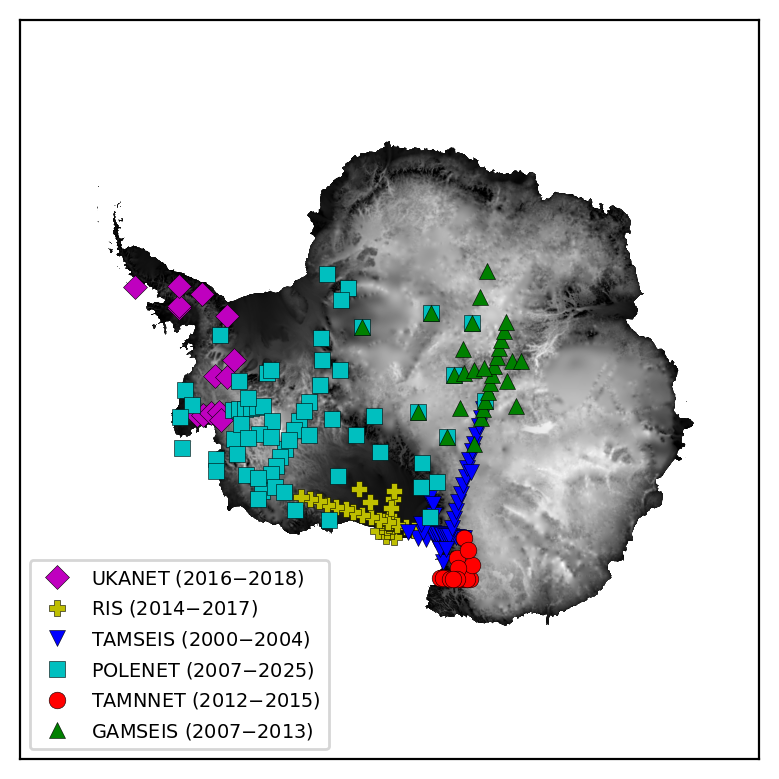

In [74]:
import rasterio
import numpy as np

## Read the bedmap2 dataset from the GeoTIFF file
with rasterio.open('bedmap2_tiff/bedmap2_thickness.tif') as src:
    img_data = src.read(1)

## Create a map of the Antarctic region at low resolution. 
m = Basemap(projection='spstere', boundinglat=-60, lon_0=180, resolution='c')

## Plot the Bedmap2 surface elevation data
m.imshow(img_data, cmap='gray', vmin=0, vmax=4500, origin='upper')

## Plot the location of the stations in the inventory
for net in inv:
    # Collect station geographical coordinates
    stla = [sta.latitude for sta in net]
    stlo = [sta.longitude for sta in net]
    # Check if the network is in the list of major networks
    for ii, network in enumerate(networks):
        if f"({network})" in net.description:
            m.plot(stlo, stla, markers[ii], latlon=True, mec='k', mew=0.2,
                    label=f"{network} ({net.start_date.year}$-${net.end_date.year})")
            break
## Add a legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower left', fontsize='x-small')

## Show the map
plt.show()

## Ice speed background map

## Mosaic satellite image as map backgroun

## Multiple panels maps